## Description of data


In [524]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Loading the data 


In [525]:
data = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week7\Project7_Supervised_Learning\imdb_processed.csv')

In [526]:
data.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


Drop unnamed column

In [527]:
#We are droping unamed column as it has no information
data.drop(columns='Unnamed: 0', inplace=True)

In [528]:
#Checking the shape of data
data.shape

(8451, 13)

In [529]:
#We are checking the type of data 
data.dtypes

title        object
year        float64
kind         object
genre        object
rating      float64
vote        float64
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime     float64
dtype: object

In [530]:
data.describe()

,year,rating,vote,runtime
count,8451.000000,8135.000000,8.135000e+03,6798.000000
mean,1991.626080,6.680000,1.873295e+04,99.984113
std,15.129001,1.281778,8.957999e+04,65.277725
min,1905.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.075000e+02,82.000000
50%,1998.000000,6.900000,1.531000e+03,95.000000
75%,2002.000000,7.600000,6.897500e+03,110.000000
max,2005.000000,9.600000,2.462087e+06,1620.000000


## Data Cleaning

In [531]:
#We decided to drop title column as it doesn't bring a lot of information, as title is specific to each movie. 
data.drop(columns='title', inplace=True)

In [532]:
data.isna().sum()

year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

Now, our approach for cleaning data is to go column by column and clean it, impout missing data etc. 

### Year: 
column is a float and has no missing values so we leave it like it is

### Genre

In [533]:
data.genre.value_counts()

['Documentary']                                             452
['Drama']                                                   451
['Documentary', 'Music']                                    326
['Comedy']                                                  311
['Drama', 'Romance']                                        283
                                                           ... 
['Short', 'Fantasy']                                          1
['Thriller', 'Action', 'Fantasy', 'Horror']                   1
['Animation', 'Adventure', 'Comedy', 'Horror', 'Sci-Fi']      1
['Animation', 'Drama', 'Family']                              1
['Animation', 'Action', 'Adventure', 'Crime', 'Mystery']      1
Name: genre, Length: 1436, dtype: int64

In [534]:
#We are striping the strings from brackets
data['genre'] = data['genre'].str.strip("[]")

In [535]:
#We are replacing ' by empty space
data['genre'] = data['genre'].str.replace("'","")

In [536]:
#We are creating a list at ','
data['genre'] = data['genre'].str.split(',')

In [537]:
#We are taking to first elemnts of the list
data['genre'] = data['genre'].str[:2]

In [538]:
#We create a column with the first genre
data['genre1']= data['genre'].str[0]

In [539]:
#We create a column with the second genre
data['genre2']= data['genre'].str[1]

In [540]:
#We can drop now genre column
data.drop(columns='genre', inplace=True)

In [541]:
data.head()

,year,kind,rating,vote,country,language,cast,director,composer,writer,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,Documentary,Animation
1,1994.0,video movie,8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0,Family,NaN
2,1992.0,movie,5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN,Action,Sci-Fi
3,2004.0,movie,5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0,Documentary,Comedy
4,1991.0,movie,4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0,Comedy,Horror


In [542]:
data.isna().sum()

year           0
kind           0
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
genre1        67
genre2      1952
dtype: int64

### Rating column - Target

We are deleting rows with missing values as we cannot work with it 

In [543]:
data =data.dropna(subset=['rating'])

In [544]:
data.isna().sum()

year           0
kind           0
rating         0
vote           0
country      177
language     283
cast          89
director    1135
composer    2456
writer      1034
runtime     1605
genre1        46
genre2      1760
dtype: int64


### Vote

We suspect that there is a high correlation between vote and rating, we will verufy that and if it is a case we will drop vote column 

In [545]:
data.rating.corr(data.vote)

0.14345913543783492

### Country

For the country column we decided to keep only the first country

In [546]:
data.country.value_counts()

['United States']                        3680
['United Kingdom']                        717
['Japan']                                 571
['India']                                 241
['Hong Kong']                             216
                                         ... 
['France', 'Italy', 'Portugal']             1
['Germany', 'Mongolia']                     1
['Sweden', 'Norway']                        1
['France', 'Martinique']                    1
['Israel', 'France', 'United States']       1
Name: country, Length: 649, dtype: int64

In [547]:
#We are striping the strings from brackets
data['country'] = data['country'].str.strip("[]")

In [548]:
#We are replacing ' by empty space
data['country'] = data['country'].str.replace("'","")

In [549]:
#We are creating a list at ','
data['country'] = data['country'].str.split(',')

In [550]:
#We are taking to first elemnts of the list
data['country'] = data['country'].str[0]

In [551]:
data.head()

,year,kind,rating,vote,country,language,cast,director,composer,writer,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,United States,['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,Documentary,Animation
1,1994.0,video movie,8.1,18.0,United States,['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0,Family,NaN
2,1992.0,movie,5.5,93.0,Japan,['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN,Action,Sci-Fi
3,2004.0,movie,5.3,13432.0,United States,"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0,Documentary,Comedy
4,1991.0,movie,4.5,2177.0,United States,['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0,Comedy,Horror


In [552]:
data.country.value_counts()

United States              4068
United Kingdom             1035
Japan                       606
Canada                      366
France                      347
                           ... 
Indonesia                     1
Armenia                       1
Palestinian Territories       1
Chile                         1
Colombia                      1
Name: country, Length: 67, dtype: int64

In [553]:
data.country.isna().sum()

177

In [554]:
#The missing values in the country column represent 2,17% of data, so we decide to drop these rows
(data.country.isna().sum()/data.shape[0])*100

2.175783650891211

In [555]:
data =data.dropna(subset=['country'])

In [556]:
data.isna().sum()

year           0
kind           0
rating         0
vote           0
country        0
language     130
cast          71
director    1045
composer    2345
writer       984
runtime     1577
genre1        42
genre2      1716
dtype: int64

### Language

In [557]:
data.language.value_counts()

['English']                                                           4844
['Japanese']                                                           394
['Hindi']                                                              192
['French']                                                             173
['English', 'French']                                                  120
                                                                      ... 
['Japanese', 'English', 'Mandarin']                                      1
['English', 'Bosnian', 'Croatian', 'Serbian']                            1
['Chinese', 'Mandarin', 'Japanese', 'Korean', 'French', 'English']       1
['English', 'Dari']                                                      1
['English', 'Spanish', 'Russian']                                        1
Name: language, Length: 704, dtype: int64

In [558]:
data.head()

,year,kind,rating,vote,country,language,cast,director,composer,writer,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,United States,['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,Documentary,Animation
1,1994.0,video movie,8.1,18.0,United States,['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0,Family,NaN
2,1992.0,movie,5.5,93.0,Japan,['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN,Action,Sci-Fi
3,2004.0,movie,5.3,13432.0,United States,"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0,Documentary,Comedy
4,1991.0,movie,4.5,2177.0,United States,['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0,Comedy,Horror


We see and suspect that the country is correlated with the language. Thus we can drop that column as coutry column bears the same information.

In [559]:
data.drop(columns='language', inplace=True)

### Cast

In [560]:
data.cast.value_counts()

['Rod Serling', 'Robert McCord', 'Jay Overholts', 'Vaughn Taylor', 'David Armstrong', 'James Turley', 'Jack Klugman', 'Burgess Meredith', 'John Anderson', "J. Pat O'Malley", 'Barney Phillips', 'George Mitchell', 'Cyril Delevanti', 'Jon Lormer', 'John McLiam', 'Bill Erwin', 'Nan Peterson', 'Lew Brown', 'S. John Launer', 'Gladys Cooper', 'Albert Salmi', 'John Dehner', 'John Larch', 'James Best', 'Gail Kobe', 'Paul Comi', 'Michael Fox', 'Bill Mumy', 'Wallace Rooney', 'Oscar Beregi Jr.', 'Ben Wright', 'Vladimir Sokoloff', 'Raymond Bailey', 'Stafford Repp', 'Paul Mazursky', 'Russ Bender', 'Marjorie Bennett', 'Don Keefer', 'Lew Gallo', 'Hugh Sanders', 'Sandy Kenyon', 'James Millhollin', 'Mary Gregory', "Pat O'Malley", 'Arch Johnson', 'Hank Patterson', 'Morgan Brittany', 'Jason Wingreen', 'Joseph V. Perry', 'Milton Parsons']                                                  42
['Clyde Brown', 'Eric Gruendemann', 'Lucy Lawless', 'William Gregory Lee', 'Hudson Leick', "Renée O'Connor", 'Ted Raim

In [561]:
data.cast.isna().sum()

71

We assume that the fisrt actor in the cast is the most important one. So firstly we will just get the fisrt actor. Then we will see what to do with the column. Maybe there is too much variaty in that column and then we will have to drop it.

In [562]:
#We are striping the strings from brackets
data['cast'] = data['cast'].str.strip("[]")
#We are replacing ' by empty space
data['cast'] = data['cast'].str.replace("'","")
#We are creating a list at ','
data['cast'] = data['cast'].str.split(',')
#We are taking to first elemnts of the list
data['cast'] = data['cast'].str[0]

In [563]:
data.head()

,year,kind,rating,vote,country,cast,director,composer,writer,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,United States,Christian Slater,NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,Documentary,Animation
1,1994.0,video movie,8.1,18.0,United States,Paula Abdul,['Steve Purcell'],NaN,NaN,83.0,Family,NaN
2,1992.0,movie,5.5,93.0,Japan,Kai Shishido,['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN,Action,Sci-Fi
3,2004.0,movie,5.3,13432.0,United States,Marlee Matlin,"['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0,Documentary,Comedy
4,1991.0,movie,4.5,2177.0,United States,Brick Bronsky,['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0,Comedy,Horror


In [564]:
data.cast.value_counts()

Rod Serling           42
Jackie Chan           30
John Nettles          27
Amitabh Bachchan      25
Andy Lau              20
                      ..
Jessica Tuck           1
Julie Aigner-Clark     1
Clayton Halsey         1
Anna Geislerová        1
Tomonori Yazaki        1
Name: cast, Length: 4842, dtype: int64

In [565]:
len(data.cast.unique())

4843

We think that there is too much variaty in that column so we decided to drop it.

In [566]:
data.drop(columns='cast', inplace=True)

### Director

In [567]:
data.isna().sum()

year           0
kind           0
rating         0
vote           0
country        0
director    1045
composer    2345
writer       984
runtime     1577
genre1        42
genre2      1716
dtype: int64

In [568]:
#We look at rows with missing director and we see that these rows are also missing values in diffrent columns. Thus maybe it will be benfeicial to drop these rows. We will dicide after processing director column
data[data.director.isna()]

,year,kind,rating,vote,country,director,composer,writer,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,United States,NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,Documentary,Animation
14,2000.0,tv series,7.6,23785.0,United States,NaN,NaN,"['Dave Willis', 'Dave Willis', 'Dave Willis']",85.0,Animation,Comedy
16,1993.0,tv mini series,6.9,1605.0,United Kingdom,NaN,NaN,"['Michael Haggiag', 'D.H. Lawrence', 'Ken Russ...",90.0,Drama,Romance
19,1996.0,tv mini series,5.3,129.0,France,NaN,NaN,"['Clarisse Battas', 'Clarisse Battas', 'Jean-P...",145.0,Drama,Comedy
22,1993.0,video movie,8.3,102.0,United States,NaN,"['Gerald Casale', 'Mark Mothersbaugh']",NaN,45.0,Documentary,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
8395,1996.0,tv series,7.5,1466.0,United Kingdom,NaN,NaN,"['John Bowen', 'John Bowen', 'John Bowen']",NaN,Comedy,Crime
8406,2001.0,tv series,5.8,165.0,Japan,NaN,NaN,"['Takeshi Mori', ""Ken'ichi Kanemaki"", 'Mayori ...",NaN,Animation,Comedy
8412,2004.0,video movie,8.3,16.0,United States,NaN,NaN,NaN,NaN,Music,NaN
8435,2003.0,tv mini series,6.9,712.0,United States,NaN,NaN,"['Donna Powers', 'Wayne Powers']",NaN,Drama,Romance


We will keep only the first director 

In [569]:
#We are striping the strings from brackets
data['director'] = data['director'].str.strip("[]")
#We are replacing ' by empty space
data['director'] = data['director'].str.replace("'","")
#We are creating a list at ','
data['director'] = data['director'].str.split(',')
#We are taking to first elemnts of the list
data['director'] = data['director'].str[0]

In [570]:
len(data.director.unique())

4079

This column has 1045 missing values and 4079 unique values so we decide to drop it, because this column would have to be encoded creating over 4000 columns, so this is not practical

In [571]:
data.drop(columns='director', inplace=True)

### Composer

In [572]:
(data.composer.isna().sum()/data.shape[0])*100

29.467202814777583

This column has almost 30% of missing values so we cand drop it.

In [573]:
data.drop(columns='composer',inplace=True)

### Writer

In [574]:
(data.writer.isna().sum()/data.shape[0])*100

12.364915807991958

In [575]:
#We are striping the strings from brackets
data['writer'] = data['writer'].str.strip("[]")
#We are replacing ' by empty space
data['writer'] = data['writer'].str.replace("'","")
#We are creating a list at ','
data['writer'] = data['writer'].str.split(',')
#We are taking to first elemnts of the list
data['writer'] = data['writer'].str[0]

In [576]:
len(data.writer.unique())

4984

We decide to drop writer column because it has 12% of missing rows and there is too much variety in that column. Besides we belive that people don't look at the writers while rating the movie

In [577]:
data.drop(columns='writer',inplace=True)

### Kind

In [578]:
data.kind.value_counts()

movie             4940
video movie       1167
tv movie           737
tv series          561
episode            293
tv mini series     237
tv short            13
video game          10
Name: kind, dtype: int64

In [579]:
data.kind.isna().sum()

0

This column is OK 


### Genre1

In [580]:
data.genre1.isna().sum()

42

In [581]:
data[data.genre1.isna()]

,year,kind,rating,vote,country,runtime,genre1,genre2
39,1999.0,video movie,8.1,57.0,United States,NaN,NaN,NaN
44,1993.0,movie,6.1,47.0,Hong Kong,96.0,NaN,NaN
387,2002.0,video movie,6.4,9.0,United Kingdom,85.0,NaN,NaN
493,2001.0,video movie,8.7,133.0,United States,97.0,NaN,NaN
821,1995.0,movie,5.7,53.0,Taiwan,60.0,NaN,NaN
1042,2004.0,video movie,6.8,20.0,United States,55.0,NaN,NaN
1294,2001.0,video movie,8.1,21.0,United States,95.0,NaN,NaN
1435,1999.0,video movie,4.6,13.0,United States,101.0,NaN,NaN
1883,1989.0,movie,9.0,5.0,United States,98.0,NaN,NaN
2113,1980.0,video movie,7.8,46.0,United Kingdom,184.0,NaN,NaN


In [582]:
data[data.kind=='video movie']

,year,kind,rating,vote,country,runtime,genre1,genre2
1,1994.0,video movie,8.1,18.0,United States,83.0,Family,NaN
6,1988.0,video movie,8.0,81.0,United States,55.0,Documentary,Music
7,2005.0,video movie,4.8,7153.0,United Kingdom,118.0,Action,Comedy
15,1998.0,video movie,4.6,1484.0,United States,117.0,Animation,Adventure
18,2003.0,video movie,2.8,120.0,United States,72.0,Romance,NaN
...,...,...,...,...,...,...,...,...
8403,2004.0,video movie,5.9,1296.0,United States,NaN,Comedy,NaN
8412,2004.0,video movie,8.3,16.0,United States,NaN,Music,NaN
8424,1988.0,video movie,4.7,1257.0,United States,NaN,Horror,NaN
8426,1998.0,video movie,8.0,122.0,United States,NaN,Music,NaN


In [583]:
data.genre1.value_counts()

Drama          1461
Comedy         1425
Documentary    1209
Action         1081
Animation       747
Crime           481
Horror          325
Adventure       323
Biography       238
Music           203
Family           69
Short            68
Fantasy          53
Thriller         41
Mystery          31
Sci-Fi           30
Musical          28
Romance          26
Western          24
Sport            22
Reality-TV       12
History           7
Game-Show         6
Film-Noir         4
Talk-Show         1
War               1
Name: genre1, dtype: int64

We noticed that the rows with missing genre1 are mainly video movies, so we wanted to check if there is a sepecific type of genre conectted to that kind of movies, but there is not, so we will drop these 42 rows.

In [584]:
data =data.dropna(subset=['genre1'])

### Genre2

In [585]:
data.genre2.value_counts()

 Drama          1423
 Comedy          562
 Romance         530
 Adventure       477
 Music           436
 Crime           379
 Action          299
 Horror          245
 Thriller        229
 Family          224
 Fantasy         196
 Sci-Fi          194
 Biography       190
 History         170
 Mystery         168
 Short           140
 Musical          94
 War              79
 Sport            70
 Western          44
 Documentary      38
 Animation        20
 Reality-TV       14
 Film-Noir        10
 Talk-Show         7
 News              3
 Game-Show         1
Name: genre2, dtype: int64

In [586]:
data.genre2.isna().sum()

1674

In [587]:
data.genre2=data.genre2.fillna('no')

In [588]:
data.genre2=data.genre2.str.strip(' ')

In [589]:
data.genre2.isna().sum()

0

In [590]:
data.genre2.value_counts()

no             1674
Drama          1423
Comedy          562
Romance         530
Adventure       477
Music           436
Crime           379
Action          299
Horror          245
Thriller        229
Family          224
Fantasy         196
Sci-Fi          194
Biography       190
History         170
Mystery         168
Short           140
Musical          94
War              79
Sport            70
Western          44
Documentary      38
Animation        20
Reality-TV       14
Film-Noir        10
Talk-Show         7
News              3
Game-Show         1
Name: genre2, dtype: int64

### Runtime

In [591]:
data.runtime.isna().sum()

1572

We decided to input the missing values of NaN depending on mean values for that specific kind of genre1

In [592]:
avereage_runtime = data.groupby('genre1')['runtime'].agg('mean')
avereage_runtime

genre1
Action         102.887743
Adventure       97.172691
Animation      101.987402
Biography       98.542105
Comedy         101.043478
Crime           99.306630
Documentary     97.820080
Drama          100.020374
Family          97.482759
Fantasy         88.609756
Film-Noir      107.666667
Game-Show       91.800000
History         79.857143
Horror         102.783133
Music          106.000000
Musical        106.521739
Mystery         88.846154
Reality-TV     112.636364
Romance        104.809524
Sci-Fi          94.041667
Short           87.571429
Sport           85.315789
Talk-Show       66.000000
Thriller        97.054054
War                   NaN
Western         84.722222
Name: runtime, dtype: float64

We see that there is missing value for War, and while analysing column genre1 we could observe that there is only one value like that so we can drop it.

In [593]:
data[data.genre1 == 'War']

,year,kind,rating,vote,country,runtime,genre1,genre2
7797,2001.0,movie,7.2,5714.0,Czechia,NaN,War,Drama


In [594]:
data.drop([7797], inplace=True)

In [595]:
data[data.genre1 == 'War']

,year,kind,rating,vote,country,runtime,genre1,genre2


In [596]:
#We create a list of uhnique genres
genre1_unique = data.genre1[data.runtime.isna()].unique()

In [597]:
genre1_unique 

array(['Action', 'Fantasy', 'Documentary', 'Comedy', 'Drama', 'Animation',
       'Music', 'Horror', 'Adventure', 'Crime', 'Biography', 'Short',
       'Romance', 'Musical', 'Sport', 'Western', 'Thriller', 'Reality-TV',
       'Sci-Fi', 'Family', 'Mystery', 'Game-Show', 'Film-Noir'],
      dtype=object)

In [598]:
#We rerun this part of code to have updated list without war
avereage_runtime = data.groupby('genre1')['runtime'].agg('mean')
avereage_runtime

genre1
Action         102.887743
Adventure       97.172691
Animation      101.987402
Biography       98.542105
Comedy         101.043478
Crime           99.306630
Documentary     97.820080
Drama          100.020374
Family          97.482759
Fantasy         88.609756
Film-Noir      107.666667
Game-Show       91.800000
History         79.857143
Horror         102.783133
Music          106.000000
Musical        106.521739
Mystery         88.846154
Reality-TV     112.636364
Romance        104.809524
Sci-Fi          94.041667
Short           87.571429
Sport           85.315789
Talk-Show       66.000000
Thriller        97.054054
Western         84.722222
Name: runtime, dtype: float64

In [599]:
avereage_runtime = pd.DataFrame(avereage_runtime)

In [600]:
avereage_runtime.loc['Action'][0]

102.8877434135166

In [609]:
for genre in genre1_unique:
	mean = avereage_runtime.loc[genre][0]
	data.loc[data.genre1==genre,'runtime'] = data.loc[data.genre1==genre,'runtime'].fillna(mean)
	

In [610]:
data.head()

,year,kind,rating,vote,country,runtime,genre1,genre2
0,2003.0,tv mini series,7.7,474.0,United States,50.000000,Documentary,Animation
1,1994.0,video movie,8.1,18.0,United States,83.000000,Family,no
2,1992.0,movie,5.5,93.0,Japan,102.887743,Action,Sci-Fi
3,2004.0,movie,5.3,13432.0,United States,60.000000,Documentary,Comedy
4,1991.0,movie,4.5,2177.0,United States,96.000000,Comedy,Horror


In [612]:
data.isna().sum()

year       0
kind       0
rating     0
vote       0
country    0
runtime    0
genre1     0
genre2     0
dtype: int64

Now we can save the data in the seprate file before encoding 

In [613]:
data.to_csv(r'C:\Users\radek\IronHack\IronRadek\Week7\Project7_Supervised_Learning\data_netfilix_clean.csv')

## EDA

Movies per year

In [621]:
movies_year = data.groupby('year')['kind'].agg('count')

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='kind'>

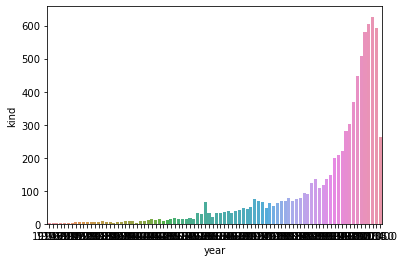

In [622]:
sns.barplot(movies_year.index,movies_year)

Movies per country

In [623]:
movies_country = data.groupby('country')['kind'].agg('count')

C:\Users\radek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='kind'>

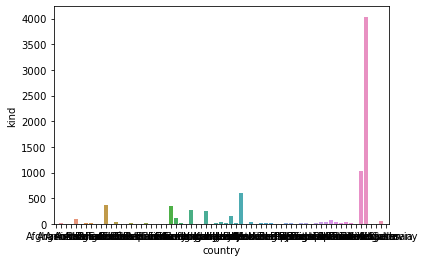

In [624]:
sns.barplot(movies_country.index,movies_country)

Most popular genre per year

In [635]:
movies_country = pd.crosstab(data.year, data.genre1)

In [631]:
movies_country

genre1,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Western
year,,,,,,,,,,,,,,,,,,,,,
1914.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918.0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1922.0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001.0,65,13,67,18,111,32,106,112,7,5,...,2,1,3,2,2,2,1,0,6,0
2002.0,65,8,64,19,95,43,136,99,5,3,...,2,2,1,2,1,8,0,0,3,1
2003.0,65,17,77,15,96,31,133,89,9,5,...,3,3,1,3,2,12,4,0,2,1


Most popular genre per country

In [640]:
movies_country_genre = pd.crosstab(data.country, data.genre1, values=data.genre1, aggfunc='max')

In [641]:
movies_country_genre

genre1,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Western
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,Action,Adventure,NaN,NaN,Comedy,Crime,Documentary,Drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Short,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aruba,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,NaN,...,NaN,NaN,NaN,NaN,NaN,Short,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,NaN,Thriller,Western
Venezuela,NaN,NaN,NaN,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,Comedy,Crime,NaN,Drama,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Encoding the Data 

In [643]:
data.dtypes

year       float64
kind        object
rating     float64
vote       float64
country     object
runtime    float64
genre1      object
genre2      object
dtype: object

In [644]:
from sklearn.preprocessing import LabelEncoder

In [648]:
lbl_ebcode = LabelEncoder()
data.kind = lbl_ebcode.fit_transform(data.kind)
data.country = lbl_ebcode.fit_transform(data.country)
data.genre1 = lbl_ebcode.fit_transform(data.genre1)
data.genre2 = lbl_ebcode.fit_transform(data.genre2)

In [649]:
data.head()

,year,kind,rating,vote,country,runtime,genre1,genre2
0,2003.0,2,7.7,474.0,62,50.000000,6,2
1,1994.0,7,8.1,18.0,62,83.000000,8,27
2,1992.0,1,5.5,93.0,37,102.887743,0,20
3,2004.0,1,5.3,13432.0,62,60.000000,6,4
4,1991.0,1,4.5,2177.0,62,96.000000,4,13


In [653]:
data.to_csv(r'C:\Users\radek\IronHack\IronRadek\Week7\Project7_Supervised_Learning\data_encoded.csv', index=False)

In [654]:
data.corr()

,year,kind,rating,vote,country,runtime,genre1,genre2
year,1.000000,0.261312,-0.175124,-0.017596,-0.045474,0.007951,0.003158,0.019557
kind,0.261312,1.000000,-0.011941,-0.098585,0.165543,0.011993,0.144620,0.102432
rating,-0.175124,-0.011941,1.000000,0.148769,0.046090,-0.002163,0.036219,-0.038078
vote,-0.017596,-0.098585,0.148769,1.000000,0.049417,-0.005021,-0.063021,-0.053120
country,-0.045474,0.165543,0.046090,0.049417,1.000000,0.003913,0.081620,0.085472
runtime,0.007951,0.011993,-0.002163,-0.005021,0.003913,1.000000,-0.017034,0.001727
genre1,0.003158,0.144620,0.036219,-0.063021,0.081620,-0.017034,1.000000,0.485832
genre2,0.019557,0.102432,-0.038078,-0.053120,0.085472,0.001727,0.485832,1.000000
